In [3]:
# import packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf

# Data Import and Visulization

In [17]:
GPA = pd.read_table('TestExer2-GPA.txt')
GPA

,Observ.,FGPA,SATM,SATV,FEM
0,1,2.518,4.0,4.0,1
1,2,2.326,4.9,3.1,0
2,3,3.003,4.4,4.0,1
3,4,2.111,4.9,3.9,0
4,5,2.145,4.3,4.7,0
...,...,...,...,...,...
604,605,3.880,7.3,7.1,0
605,606,3.678,7.8,7.0,1
606,607,3.581,7.8,7.1,0
607,608,2.973,7.4,7.6,0


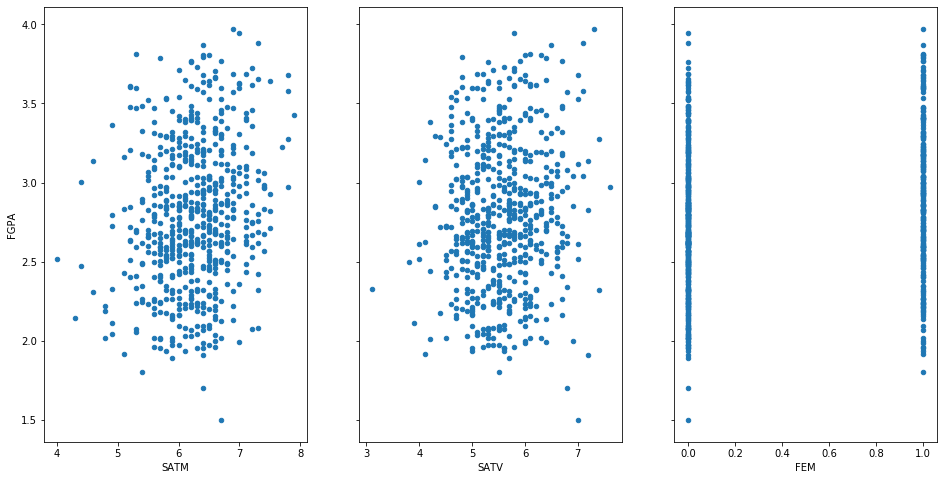

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
GPA.plot(kind='scatter', x='SATM', y='FGPA', ax=axs[0], figsize=(16, 8))
GPA.plot(kind='scatter', x='SATV', y='FGPA', ax=axs[1])
GPA.plot(kind='scatter', x='FEM', y='FGPA', ax=axs[2])

# (a) Simple Regression
## Parameters and Regression Line

In [6]:
# create a fitted model
slm = smf.ols(formula='FGPA ~ SATV', data=GPA).fit()

# print the coefficients
slm.params

Intercept    2.441732
SATV         0.063086
dtype: float64

In [7]:
slm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FGPA   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.201
Date:                Sun, 22 Sep 2019   Prob (F-statistic):             0.0229
Time:                        20:50:07   Log-Likelihood:                -388.44
No. Observations:                 609   AIC:                             780.9
Df Residuals:                     607   BIC:                             789.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4417      0.155     15.747      0.000       2.137       2.746
SATV           0.0631      0.028      2.280      0.023       0.009       0.117
==============================================================================
Omnibus:                       11.335   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.694
Skew:                           0.138   Prob(JB):                       0.0213
Kurtosis:                       2.524   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
slm.conf_int()

,0,1
Intercept,2.137209,2.746256
SATV,0.008758,0.117414


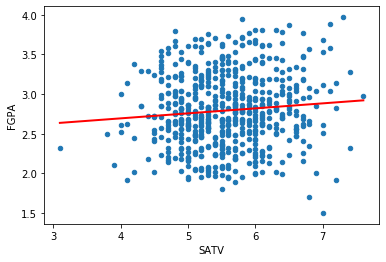

In [9]:
# create a DataFrame with the minimum and maximum values of T
SATV_new = pd.DataFrame({'SATV': [GPA.SATV.min(), GPA.SATV.max()]})
# make predictions for those x values and store them
preds = slm.predict(SATV_new)

# first, plot the observed data
GPA.plot(kind='scatter', x='SATV', y='FGPA')
# then, plot the least squares line
plt.plot(SATV_new, preds, c='red', linewidth=2)

## Prediction intervals for mean response and response observations

In [10]:
from statsmodels.stats.outliers_influence import summary_table

# get the summary results from the linear regression fit
st, sdata, ss2 = summary_table(slm, alpha=0.05)
pd.DataFrame(sdata)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,2.518,2.694076,0.047111,2.601556,2.786596,1.788592,3.599560,-0.176076,0.456230,-0.385937,0.000794
1,2.0,2.326,2.637299,0.070675,2.498502,2.776095,1.725923,3.548674,-0.311299,0.453178,-0.686923,0.005738
2,3.0,3.003,2.694076,0.047111,2.601556,2.786596,1.788592,3.599560,0.308924,0.456230,0.677124,0.002444
3,4.0,2.111,2.687767,0.049665,2.590232,2.785303,1.781757,3.593778,-0.576767,0.455959,-1.264954,0.009492
4,5.0,2.145,2.738236,0.030296,2.678738,2.797733,1.835528,3.640944,-0.593236,0.457654,-1.296254,0.003682
...,...,...,...,...,...,...,...,...,...,...,...,...
604,605.0,3.880,2.889642,0.046356,2.798604,2.980680,1.984308,3.794976,0.990358,0.456307,2.170375,0.024308
605,606.0,3.678,2.883333,0.043836,2.797244,2.969422,1.978484,3.788183,0.794667,0.456556,1.740567,0.013965
606,607.0,3.581,2.889642,0.046356,2.798604,2.980680,1.984308,3.794976,0.691358,0.456307,1.515115,0.011846
607,608.0,2.973,2.921185,0.059288,2.804751,3.037619,2.012946,3.829424,0.051815,0.454808,0.113927,0.000110


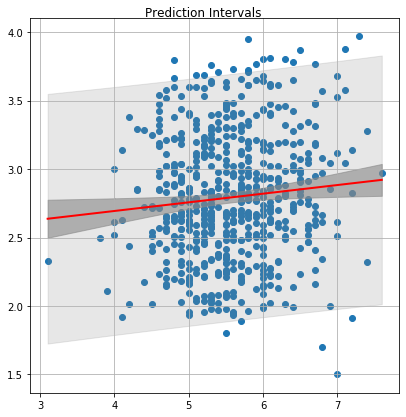

In [11]:
# fitted values by the model
fittedvalues = sdata[:,2]
# standard deviation of the predicted means
predict_mean_se  = sdata[:,3] 
# lower and upper limits for the predicted means
predict_mean_ci_low, predict_mean_ci_upp = sdata[:,4:6].T  
# lower and upper limits for the predicted observations
predict_ci_low, predict_ci_upp = sdata[:,6:8].T 

## Method 2
# the observation interval can be obtained by built-in function as follows
# from statsmodels.sandbox.regression.predstd import wls_prediction_std
# prstd, predict_ci_low, predict_ci_upp = wls_prediction_std(lm)

## plot the prediction interval
fig, ax = plt.subplots(figsize=(6, 6))
SATV_pred = GPA['SATV'];
idx = np.argsort(SATV_pred)
# numpy.argsort() returns the indices that would sort an array
ax.scatter(SATV_pred, GPA['FGPA'])
fig.suptitle('Prediction Intervals')
fig.tight_layout(pad=2); 
ax.grid(True)
ax.plot(SATV_pred.iloc[idx], fittedvalues[idx], '-', color='red', linewidth=2)
# interval for observations
ax.fill_between(SATV_pred.iloc[idx], predict_ci_low[idx], predict_ci_upp[idx], color='#888888', alpha=0.2)
# interval for mean responses
ax.fill_between(SATV_pred.iloc[idx], predict_mean_ci_low[idx], predict_mean_ci_upp[idx], color='#888888', alpha=0.6)

# (b) Multipla Regression
## Estimating Model Parameters

In [12]:
# create a fitted model
mlm = smf.ols(formula='FGPA ~ SATM+SATV+FEM', data=GPA).fit()

# print the coefficients
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FGPA   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     18.24
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.41e-11
Time:                        20:50:09   Log-Likelihood:                -364.67
No. Observations:                 609   AIC:                             737.3
Df Residuals:                     605   BIC:                             755.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5570      0.216      7.205      0.000       1.133       1.981
SATM           0.1727      0.032      5.410      0.000       0.110       0.235
SATV           0.0142      0.028      0.507      0.612      -0.041       0.069
FEM            0.2003      0.037      5.358      0.000       0.127       0.274
==============================================================================
Omnibus:                        7.757   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                5.727
Skew:                           0.118   Prob(JB):                       0.0571
Kurtosis:                       2.588   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Get the covariance
mlm.cov_params()

,Intercept,SATM,SATV,FEM
Intercept,0.046697,-0.004977,-0.002649,-0.001390
SATM,-0.004977,0.001019,-0.000265,0.000215
SATV,-0.002649,-0.000265,0.000780,-0.000089
FEM,-0.001390,0.000215,-0.000089,0.001397


# (c) Correlations

In [14]:
# Measure the correlation
GPA.iloc[:,1:].corr()

,FGPA,SATM,SATV,FEM
FGPA,1.000000,0.195040,0.092167,0.176491
SATM,0.195040,1.000000,0.287801,-0.162680
SATV,0.092167,0.287801,1.000000,0.033577
FEM,0.176491,-0.162680,0.033577,1.000000


# (d) F-test on SATV

In [40]:
# create a restricted fitted model without SATV
rmlm = smf.ols(formula='FGPA ~ SATM+FEM', data=GPA).fit()

rmlm.summary()

0.25715514284401925

In [22]:
R0_2 = rmlm.rsquared
R1_2 = mlm.rsquared
F = (R1_2-R0_2)*(609-3)/(1-R1_2)
F

0.25715514284401925